In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as ff


In [2]:
# Load data
Dat = np.load('data.npy')
Stim = np.load('stimulus.npy')
neurons_num = np.shape(Dat)[0]
time = np.shape(Stim)[0]
height = np.shape(Stim)[1]
width = np.shape(Stim)[2]

print('Neuron Data Shape (output): ')
print(Dat.shape)
print('Natural Movie Shape (input): ')
print(Stim.shape)

Neuron Data Shape (output): 
(536, 30025)
Natural Movie Shape (input): 
(900, 304, 608)


In [3]:
# %% Bin the data to match the 900 frames - i.e. 30025 recordings to 900 frames
Dat_binned = np.zeros((neurons_num, time))
for n in np.arange(325): 
    binn = np.sum(Dat[:, (n*34):((n+1)*34)], axis = 1)
    Dat_binned[:, n] = binn

for n in np.arange(325, 900):
    binn = np.sum(Dat[:, (n*33):((n+1)*33)], axis = 1)
    Dat_binned[:, n] = binn
  

In [4]:
# %% Print new shapes
print('New Shapes')
print('Neuron Data Shape (output): ')
print(Dat_binned.shape)
print('Natural Movie Shape (input): ')
print(Stim.shape)

New Shapes
Neuron Data Shape (output): 
(536, 900)
Natural Movie Shape (input): 
(900, 304, 608)


In [5]:
# %% Find which frame incur the most spikes 
spikes_max = np.zeros((neurons_num, 1))
for n in np.arange(neurons_num):
    neuron_activity = Dat_binned[n, :]
    max_index = np.argmax(neuron_activity)
    spikes_max[n] = max_index    


In [6]:
# %% Split the spikes via region
VISal = spikes_max.flat[0:83]
VISam = spikes_max.flat[83:153]
VISl = spikes_max.flat[153:245]
VISpm = spikes_max.flat[245:331]
VISp = spikes_max.flat[331:475]
VISrl = spikes_max.flat[475:]


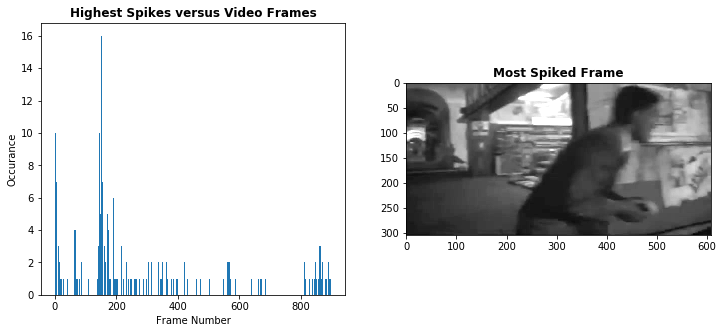

In [7]:
# Plot for all regions
def plot_reg(neuron_spikes, region_name, file_name):
    time = 900
    unique, counts = np.unique(neuron_spikes, return_counts=True)
    x = dict(zip(unique, counts))
    v, k = max((v, k) for k, v in x.items())
    
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].hist(neuron_spikes, bins = np.arange(time))
    ax[0].set_title('Highest Spikes {}versus Video Frames'.format(region_name), fontweight = 'bold')
    ax[0].set_xlabel('Frame Number')
    ax[0].set_ylabel('Occurance')
    ax[1].imshow(Stim[int(k), :, :], cmap='gray')
    ax[1].set_title('Most Spiked Frame', fontweight='bold')
    plt.savefig(file_name)
    plt.show()
    
    
plot_reg(spikes_max.flat, '', 'all.png')

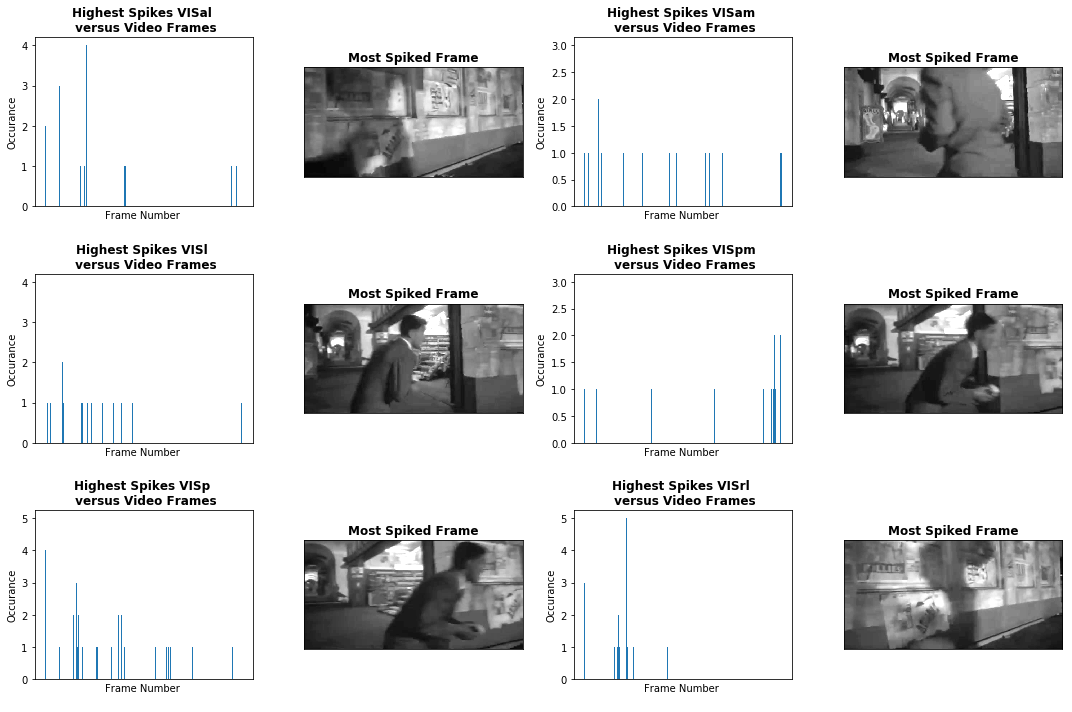

In [8]:
# Plot for separate regions
time = 900

neuron_spikes_list = [VISal, VISam, VISl, VISpm, VISp, VISrl]
neuron_regions = ['VISal', 'VISam', 'VISl', 'VISpm', 'VISp', 'VISrl']

count = 0
i = 0
j = 0

fig, ax = plt.subplots(3,4, figsize=(15,10))
for neuron_spikes in neuron_spikes_list:
    unique, counts = np.unique(neuron_spikes, return_counts=True)
    x = dict(zip(unique, counts))
    v, k = max((v, k) for k, v in x.items())
    
    ax[i][j].hist(neuron_spikes, bins = np.arange(time))
    ax[i][j].set_title('Highest Spikes {} \n versus Video Frames'.format(neuron_regions[count]), fontweight = 'bold')
    ax[i][j].set_xlabel('Frame Number \n')
    ax[i][j].set_ylabel('Occurance')
    ax[i][j].set_xticks([])
    ax[i][j+1].imshow(Stim[int(k), :, :], cmap='gray')
    ax[i][j+1].set_title('Most Spiked Frame', fontweight='bold')
    ax[i][j+1].set_xticks([])
    ax[i][j+1].set_yticks([])
    
    count += 1
    j += 2
    if j == 4:
        i += 1
        j = 0

plt.tight_layout()
plt.savefig('a.png', bbox_inches="tight")